<a href="https://colab.research.google.com/github/Code-By-Pitt/Capstone_Two/blob/main/Captsone2_Hyperparameters_%26_Modelling_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Only necessary to run this cell once
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/gdrive/MyDrive/Springboard/Capstone2/Raw_Data/cleaned_daily_data.csv')
data.head()


,Day,campaign_label,Clicks,Impr.,Cost,Conversions,Conv. value,Store Visits,Store Revenue,dayName,DayofYear,Week_no,year,MonthName,Quarter,CPA,CTR,CPC,AOV,Quarter2
0,2019-01-01,Generic,17705,841317,13621.93,123.65,47208.75,676.0,56324.70,Tuesday,1,1,2019,January,1,110.165224,0.021044,0.769383,3.465643,Q1
1,2019-01-02,Generic,15741,778103,14037.76,131.54,53946.99,587.0,38713.52,Wednesday,2,1,2019,January,1,106.718565,0.020230,0.891796,3.842991,Q1
2,2019-01-03,Generic,6959,338800,4261.37,41.27,14742.38,299.0,19999.74,Thursday,3,1,2019,January,1,103.255876,0.020540,0.612354,3.459540,Q1
3,2019-01-04,Generic,8000,425764,5367.59,47.45,20522.77,360.0,22256.93,Friday,4,1,2019,January,1,113.120969,0.018790,0.670949,3.823461,Q1
4,2019-01-05,Generic,11422,697889,8417.39,70.62,24958.24,503.0,40467.47,Saturday,5,1,2019,January,1,119.192722,0.016366,0.736945,2.965081,Q1


In [ ]:
data.set_index('Day',inplace=True)
data.drop(['Quarter','DayofYear','Week_no'], axis = 1,inplace=True)
data.head()

,campaign_label,Clicks,Impr.,Cost,Conversions,Conv. value,Store Visits,Store Revenue,dayName,year,MonthName,CPA,CTR,CPC,AOV,Quarter2
Day,,,,,,,,,,,,,,,,
2019-01-01,Generic,17705,841317,13621.93,123.65,47208.75,676.0,56324.70,Tuesday,2019,January,110.165224,0.021044,0.769383,3.465643,Q1
2019-01-02,Generic,15741,778103,14037.76,131.54,53946.99,587.0,38713.52,Wednesday,2019,January,106.718565,0.020230,0.891796,3.842991,Q1
2019-01-03,Generic,6959,338800,4261.37,41.27,14742.38,299.0,19999.74,Thursday,2019,January,103.255876,0.020540,0.612354,3.459540,Q1
2019-01-04,Generic,8000,425764,5367.59,47.45,20522.77,360.0,22256.93,Friday,2019,January,113.120969,0.018790,0.670949,3.823461,Q1
2019-01-05,Generic,11422,697889,8417.39,70.62,24958.24,503.0,40467.47,Saturday,2019,January,119.192722,0.016366,0.736945,2.965081,Q1


In [ ]:
dummies = pd.get_dummies(data)


In [ ]:
dummies.duplicated().sum()

0

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime

# Create Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dummies.drop(columns=['Conversions']), 
                                                    dummies['Conversions'], test_size=0.3, 
                                                    random_state=47)
X_train.shape, X_test.shape

((1026, 36), (440, 36))

# Linear Regression

In [ ]:
pipe = make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    SelectKBest(f_regression),
    LinearRegression()
)

pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selectkbest',
                 SelectKBest(score_func=<function f_regression at 0x7fb3c0df6320>)),
                ('linearregression', LinearRegression())])

In [ ]:
y_tr_pred = pipe.predict(X_train)
y_te_pred = pipe.predict(X_test)

In [ ]:
r2_score(y_train, y_tr_pred), r2_score(y_test, y_te_pred)

(0.9785415758152356, 0.9704151876826136)

In [ ]:
mean_absolute_error(y_train, y_tr_pred), mean_absolute_error(y_test, y_te_pred)

(6.984110974747146, 6.536022403317272)

In [ ]:
mean_squared_error(y_train, y_tr_pred), mean_squared_error(y_test, y_te_pred)

(102.60619455372925, 98.62160860463197)

In [ ]:
k = [k+1 for k in range(len(X_train.columns))]
grid_params = {'selectkbest__k': k}

In [ ]:
lr_grid_cv = GridSearchCV(pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [ ]:
lr_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('selectkbest',
                                        SelectKBest(score_func=<function f_regression at 0x7fb3c0df6320>)),
                                       ('linearregression',
                                        LinearRegression())]),
             n_jobs=-1,
             param_grid={'selectkbest__k': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                            12, 13, 14, 15, 16, 17, 18, 19, 20,
                                            21, 22, 23, 24, 25, 26, 27, 28, 29,
                                            30, ...]})

In [ ]:
score_mean = lr_grid_cv.cv_results_['mean_test_score']
score_std = lr_grid_cv.cv_results_['std_test_score']
cv_k = [k for k in lr_grid_cv.cv_results_['param_selectkbest__k']]

In [ ]:
lr_grid_cv.best_params_

{'selectkbest__k': 7}

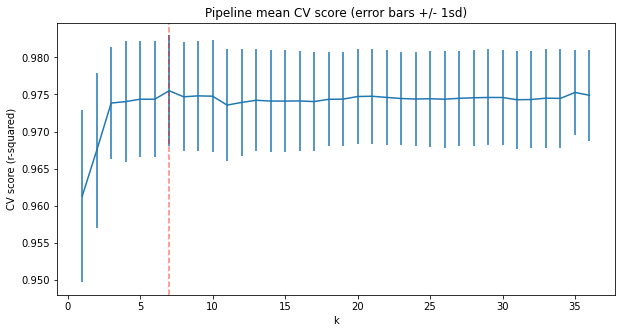

In [ ]:
best_k = lr_grid_cv.best_params_['selectkbest__k']
plt.subplots(figsize=(10, 5))
plt.errorbar(cv_k, score_mean, yerr=score_std)
plt.axvline(x=best_k, c='r', ls='--', alpha=.5)
plt.xlabel('k')
plt.ylabel('CV score (r-squared)')
plt.title('Pipeline mean CV score (error bars +/- 1sd)');

In [ ]:
lr_neg_mae = cross_validate(lr_grid_cv.best_estimator_, X_train, y_train, 
                            scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)

In [ ]:
lr_mae_mean = np.mean(-1 * lr_neg_mae['test_score'])
lr_mae_std = np.std(-1 * lr_neg_mae['test_score'])
lr_mae_mean, lr_mae_std

(7.106513852847362, 0.2775372757571184)

In [ ]:
mean_absolute_error(y_test, lr_grid_cv.best_estimator_.predict(X_test))

6.531569381101849

# Hyperparameter Tuning - Random Forest - GridSearch

In [ ]:
RF_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    RandomForestRegressor(random_state=47)
)

In [ ]:
RF_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'simpleimputer', 'standardscaler', 'randomforestregressor', 'simpleimputer__add_indicator', 'simpleimputer__copy', 'simpleimputer__fill_value', 'simpleimputer__missing_values', 'simpleimputer__strategy', 'simpleimputer__verbose', 'standardscaler__copy', 'standardscaler__with_mean', 'standardscaler__with_std', 'randomforestregressor__bootstrap', 'randomforestregressor__ccp_alpha', 'randomforestregressor__criterion', 'randomforestregressor__max_depth', 'randomforestregressor__max_features', 'randomforestregressor__max_leaf_nodes', 'randomforestregressor__max_samples', 'randomforestregressor__min_impurity_decrease', 'randomforestregressor__min_samples_leaf', 'randomforestregressor__min_samples_split', 'randomforestregressor__min_weight_fraction_leaf', 'randomforestregressor__n_estimators', 'randomforestregressor__n_jobs', 'randomforestregressor__oob_score', 'randomforestregressor__random_state', 'randomforestregressor__verbose', 'randomforestregres

In [ ]:
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5)

In [ ]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.96216427, 0.96141693, 0.97376778, 0.98050496, 0.96626306])

In [ ]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.9688234018306809, 0.00730288813361085)

In [ ]:
n_est = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
grid_params = {
        'standardscaler': [StandardScaler(), PowerTransformer(),None],
        'simpleimputer__strategy': ['mean', 'median'],
        'randomforestregressor__n_estimators': n_est
}

In [ ]:
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [ ]:
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__n_estimators': [10, 12, 16, 20,
                                                                 26, 33, 42, 54,
                                                                 69, 88, 112,
                                                                 143, 183, 233,
                                                                 297, 379, 483,
                                                                 615, 784,
                                                                 1000],
                         'simpleimputer__strategy': [

In [ ]:
rf_grid_cv.best_params_

{'randomforestregressor__n_estimators': 483,
 'simpleimputer__strategy': 'mean',
 'standardscaler': StandardScaler()}

In [ ]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.96808435, 0.96956268, 0.97314489, 0.9824023 , 0.96322863])

In [ ]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.9712845715192577, 0.006405767221564522)

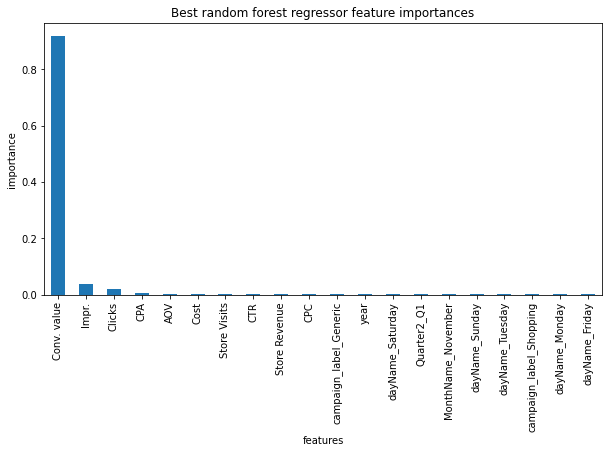

In [ ]:
plt.subplots(figsize=(10, 5))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.nlargest(20).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

In [ ]:
fractions = [.2, .25, .3, .35, .4, .45, .5, .6, .75, .8, 1.0]
train_size, train_scores, test_scores = learning_curve(RF_pipe, X_train, y_train, train_sizes=fractions)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

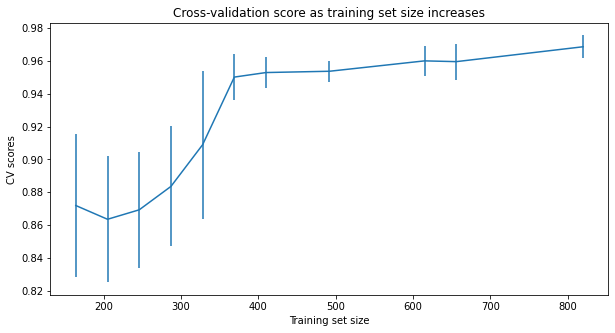

In [ ]:
plt.subplots(figsize=(10, 5))
plt.errorbar(train_size, test_scores_mean, yerr=test_scores_std)
plt.xlabel('Training set size')
plt.ylabel('CV scores')
plt.title('Cross-validation score as training set size increases');

# Random Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(n) for n in np.logspace(start=1, stop=3, num=20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid ={
        'standardscaler': [StandardScaler(), PowerTransformer(),None],
        'simpleimputer__strategy': ['mean', 'median'],
        'randomforestregressor__n_estimators': n_est,
        'randomforestregressor__max_features': max_features,
        'randomforestregressor__max_depth':max_depth,
        'randomforestregressor__min_samples_split':min_samples_split,
        'randomforestregressor__min_samples_leaf':min_samples_leaf,
        'randomforestregressor__bootstrap':bootstrap}
print(random_grid)  

{'standardscaler': [StandardScaler(), PowerTransformer(), None], 'simpleimputer__strategy': ['mean', 'median'], 'randomforestregressor__n_estimators': [10, 12, 16, 20, 26, 33, 42, 54, 69, 88, 112, 143, 183, 233, 297, 379, 483, 615, 784, 1000], 'randomforestregressor__max_features': ['auto', 'sqrt'], 'randomforestregressor__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'randomforestregressor__min_samples_split': [2, 5, 10], 'randomforestregressor__min_samples_leaf': [1, 2, 4], 'randomforestregressor__bootstrap': [True, False]}


In [ ]:

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RF_pipe, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('simpleimputer',
                                              SimpleImputer(strategy='median')),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('randomforestregressor',
                                              RandomForestRegressor(random_state=47))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'randomforestregressor__bootstrap': [True,
                                                                             False],
                                        'randomforestregressor__max_depth': [10,
                                                                             20,
                                                                             30,
                                                                             40,
        

In [ ]:
rf_random.best_params_

{'randomforestregressor__bootstrap': True,
 'randomforestregressor__max_depth': 20,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__n_estimators': 379,
 'simpleimputer__strategy': 'mean',
 'standardscaler': None}

# Modelling data to get the best Model

In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    mea = mean_absolute_error(test_labels,predictions)
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('Mean Absolute Error = {:0.2f}%.'.format(mea))
    
    return accuracy

In [ ]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
print("base model")
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = rf_random.best_estimator_
print("random model")
random_accuracy = evaluate(best_random,X_test, y_test)
print("Grid model")
grid_accuracy = evaluate(rf_grid_cv.best_estimator_,X_test, y_test)

base model
Average Error: 5.9689 degrees.
Accuracy = 78.60%.
Mean Absolute Error = 5.97%.
random model
Average Error: 5.8876 degrees.
Accuracy = 79.76%.
Mean Absolute Error = 5.89%.
Grid model
Average Error: 5.8405 degrees.
Accuracy = 80.78%.
Mean Absolute Error = 5.84%.


Grid search model is most effective model with the lowest Mean absolute Error